<a href="https://colab.research.google.com/github/bitmos/PySpark/blob/main/comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/bitmos/PySpark.git

Cloning into 'PySpark'...
remote: Enumerating objects: 8764, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 8764 (delta 11), reused 14 (delta 6), pack-reused 8733
Receiving objects: 100% (8764/8764), 332.59 MiB | 28.00 MiB/s, done.
Resolving deltas: 100% (805/805), done.


In [5]:
#!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 54.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=37123132dae02951c5321e194c6e7a4f7bb769cef6124c3eff61220e37fea37a
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [12]:
from pyspark.sql import SparkSession
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.sql.functions import col, when

In [7]:
spark = SparkSession.builder.appName('Practise').getOrCreate()

In [8]:
df = spark.read.csv('/content/PySpark/csvFiles/Results_Data.csv',header=True,inferSchema=True)
df.show()

+----------+--------+---+---+---+------+-----+-----+--------+
|       USN|   SCODE|CIE|SEE|TOT|RESULT|GRADE| DATE|ExamType|
+----------+--------+---+---+---+------+-----+-----+--------+
|4JN18CS001| 18MAT11| 32| 41| 73|     P|    8|12019| Regular|
|4JN18CS001| 18PHY12| 29| 47| 76|     P|    8|12019| Regular|
|4JN18CS001| 18ELE13| 25| 43| 68|     P|    7|12019| Regular|
|4JN18CS001| 18CIV14| 31| 26| 57|     P|    6|12019| Regular|
|4JN18CS001|18EGDL15| 31| 56| 87|     P|    9|12019| Regular|
|4JN18CS001|18PHYL16| 32| 40| 72|     P|    8|12019| Regular|
|4JN18CS001|18ELEL17| 34| 52| 86|     P|    9|12019| Regular|
|4JN18CS001| 18EGH18| 27| 32| 59|     P|    6|12019| Regular|
|4JN18CS002| 18MAT11| 33| 51| 84|     P|    9|12019| Regular|
|4JN18CS002| 18PHY12| 36| 45| 81|     P|    9|12019| Regular|
|4JN18CS002| 18ELE13| 37| 31| 68|     P|    7|12019| Regular|
|4JN18CS002| 18CIV14| 34| 29| 63|     P|    7|12019| Regular|
|4JN18CS002|18EGDL15| 34| 55| 89|     P|    9|12019| Regular|
|4JN18CS

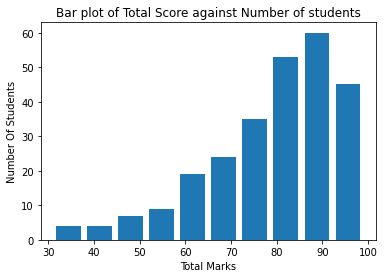

In [10]:
def subcode(subname):
    plt.title('Bar plot of Total Score against Number of students')
    plt.xlabel('Total Marks')
    plt.ylabel('Number Of Students')
    df_BySub=df.filter(df.SCODE == subname)
    x=df_BySub.toPandas()["TOT"].values.tolist()
    plt.hist(x,rwidth=0.8)
    plt.show()
subcode("18EGDL15")

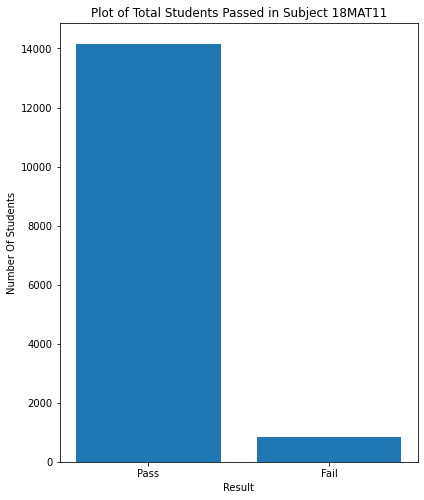

In [14]:
valueWhenTrue = "F"  # for example

df_ResultData=df.withColumn(
    "RESULT",
    when(
        col("RESULT") == 'A',
        valueWhenTrue
    ).otherwise(col("RESULT"))
)
x = ['Pass','Fail']
x_pos = [i for i, _ in enumerate(x)]
y=[df_ResultData.filter(df_ResultData.RESULT == "P").count(),df_ResultData.filter(df_ResultData.RESULT == "F").count()]
def subcode(subname):
    fig = plt.figure()
    plt.title('Plot of Total Students Passed in Subject '+ subname)
    plt.xlabel('Result')
    plt.ylabel('Number Of Students')
    plt.bar(x,y)
    plt.xticks(x_pos, x)
    plt.tight_layout()
    fig.set_figheight(8)
    fig.set_figwidth(6)
    plt.show()
subcode("18MAT11")

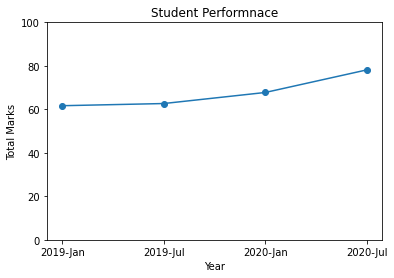

In [15]:
dfT = df.withColumn("DATE", when(df_ResultData.DATE == 'Jul-20','2020-Jul')
                                 .when(df_ResultData.DATE == '20-Jul','2020-Jul')
                                 .when(df_ResultData.DATE == 'Jan-20','2020-Jan')
                                 .when(df_ResultData.DATE == '12019','2019-Jan')
                                 .when(df_ResultData.DATE == '72019','2019-Jul')
                                 .when(df_ResultData.DATE == '12020','2020-Jan')
                                 .when(df_ResultData.DATE == '72020','2020-Jul'))
def filter(usn):
  dftry1=dfT.filter(dfT.USN == usn)
  return dftry1
def USN(usn):
      df_usn=filter(usn)
      df_data=df_usn.select('DATE','TOT')
      dfPlot1=df_data.groupBy("DATE").avg("TOT")
      dfPlot=dfPlot1.sort('DATE')
      plt.title('Student Performnace')
      plt.xlabel('Year')
      plt.ylabel('Total Marks')
      x=dfPlot.toPandas()['DATE'].values.tolist()
      y=dfPlot.toPandas()['avg(TOT)'].values.tolist()
      plt.plot(x,y,marker = 'o')
      plt.ylim(0,100)
      plt.show()


In [ ]:
import string
encoded1= {}
count =0
for i in string.ascii_uppercase:
    if i not in encoded1:
        encoded1[i]= count
    count = count +1
print (encoded1)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [ ]:
data_itr = df.rdd.toLocalIterator()
encoded = []

def replace_all1(text, encoded1):
    for i, j in encoded1.items():
        text = text.replace(i, str(j))
    return text

print(encoded1)

for i in data_itr:
    a =i['USN'] 
    b = i['SCODE']
    c = i['DATE']
    encoded.append({'USN1':a,'encodedUSN':int(replace_all1(a,encoded1)),'SCODE1':b,'DATE1':c})
        
print(encoded)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
[{'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18MAT11', 'DATE1': '12019'}, {'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18PHY12', 'DATE1': '12019'}, {'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18ELE13', 'DATE1': '12019'}, {'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18CIV14', 'DATE1': '12019'}, {'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18EGDL15', 'DATE1': '12019'}, {'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18PHYL16', 'DATE1': '12019'}, {'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18ELEL17', 'DATE1': '12019'}, {'USN1': '4JN18CS001', 'encodedUSN': 491318218001, 'SCODE1': '18EGH18', 'DATE1': '12019'}, {'USN1': '4JN18CS002', 'encodedUSN': 491318

In [ ]:
dataframe = spark.createDataFrame(encoded)
dataframe.show()
dataframe.count()

+-----+--------+----------+------------+
|DATE1|  SCODE1|      USN1|  encodedUSN|
+-----+--------+----------+------------+
|12019| 18MAT11|4JN18CS001|491318218001|
|12019| 18PHY12|4JN18CS001|491318218001|
|12019| 18ELE13|4JN18CS001|491318218001|
|12019| 18CIV14|4JN18CS001|491318218001|
|12019|18EGDL15|4JN18CS001|491318218001|
|12019|18PHYL16|4JN18CS001|491318218001|
|12019|18ELEL17|4JN18CS001|491318218001|
|12019| 18EGH18|4JN18CS001|491318218001|
|12019| 18MAT11|4JN18CS002|491318218002|
|12019| 18PHY12|4JN18CS002|491318218002|
|12019| 18ELE13|4JN18CS002|491318218002|
|12019| 18CIV14|4JN18CS002|491318218002|
|12019|18EGDL15|4JN18CS002|491318218002|
|12019|18PHYL16|4JN18CS002|491318218002|
|12019|18ELEL17|4JN18CS002|491318218002|
|12019| 18EGH18|4JN18CS002|491318218002|
|12019| 18MAT11|4JN18CS003|491318218003|
|12019| 18PHY12|4JN18CS003|491318218003|
|12019| 18ELE13|4JN18CS003|491318218003|
|12019| 18CIV14|4JN18CS003|491318218003|
+-----+--------+----------+------------+
only showing top

15000

In [ ]:
new = df.join(dataframe,(df.USN ==  dataframe.USN1) & (df.SCODE ==dataframe.SCODE1) & (df.DATE == dataframe.DATE1))
new.show()
new.drop('USN1').show()
new.count()

+----------+--------+---+---+---+------+-----+-----+--------+-----+--------+----------+------------+
|       USN|   SCODE|CIE|SEE|TOT|RESULT|GRADE| DATE|ExamType|DATE1|  SCODE1|      USN1|  encodedUSN|
+----------+--------+---+---+---+------+-----+-----+--------+-----+--------+----------+------------+
|4JN18CS001| 18MAT11| 32| 41| 73|     P|    8|12019| Regular|12019| 18MAT11|4JN18CS001|491318218001|
|4JN18CS001| 18PHY12| 29| 47| 76|     P|    8|12019| Regular|12019| 18PHY12|4JN18CS001|491318218001|
|4JN18CS001| 18ELE13| 25| 43| 68|     P|    7|12019| Regular|12019| 18ELE13|4JN18CS001|491318218001|
|4JN18CS001| 18CIV14| 31| 26| 57|     P|    6|12019| Regular|12019| 18CIV14|4JN18CS001|491318218001|
|4JN18CS001|18EGDL15| 31| 56| 87|     P|    9|12019| Regular|12019|18EGDL15|4JN18CS001|491318218001|
|4JN18CS001|18PHYL16| 32| 40| 72|     P|    8|12019| Regular|12019|18PHYL16|4JN18CS001|491318218001|
|4JN18CS001|18ELEL17| 34| 52| 86|     P|    9|12019| Regular|12019|18ELEL17|4JN18CS001|4913

15000

In [ ]:
new.createOrReplaceTempView("df2_view")

dffinal = spark.sql(
    """
    SELECT encodedUSN,TOT,
    (CASE
    WHEN SCODE LIKE '%1' THEN 1
    WHEN SCODE LIKE '%2' THEN 2
    WHEN SCODE LIKE '%3' THEN 3
    WHEN SCODE LIKE '%4' THEN 4
    WHEN SCODE LIKE '%5' THEN 5
    WHEN SCODE LIKE '%6' THEN 6
    WHEN SCODE LIKE '%7' THEN 7
    WHEN SCODE LIKE '%8' THEN 8
    WHEN SCODE LIKE '%9' THEN 9
    END) AS SCODEFINAL,
    (CASE
    WHEN DATE LIKE '%19' THEN 19
    WHEN DATE LIKE '%20' THEN 20
    END) AS NEWDATE
    
    FROM df2_view
    """
)

dffinal.show()

+------------+---+----------+-------+
|  encodedUSN|TOT|SCODEFINAL|NEWDATE|
+------------+---+----------+-------+
|491318218001| 73|         1|     19|
|491318218001| 76|         2|     19|
|491318218001| 68|         3|     19|
|491318218001| 57|         4|     19|
|491318218001| 87|         5|     19|
|491318218001| 72|         6|     19|
|491318218001| 86|         7|     19|
|491318218001| 59|         8|     19|
|491318218002| 84|         1|     19|
|491318218002| 81|         2|     19|
|491318218002| 68|         3|     19|
|491318218002| 63|         4|     19|
|491318218002| 89|         5|     19|
|491318218002| 75|         6|     19|
|491318218002| 84|         7|     19|
|491318218002| 72|         8|     19|
|491318218003| 81|         1|     19|
|491318218003| 73|         2|     19|
|491318218003| 81|         3|     19|
|491318218003| 72|         4|     19|
+------------+---+----------+-------+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['encodedUSN','NEWDATE','SCODEFINAL'],outputCol="NEW")
output=featureassembler.transform(dffinal)
output.show()

+------------+---+----------+-------+--------------------+
|  encodedUSN|TOT|SCODEFINAL|NEWDATE|                 NEW|
+------------+---+----------+-------+--------------------+
|491318218001| 73|         1|     19|[4.91318218001E11...|
|491318218001| 76|         2|     19|[4.91318218001E11...|
|491318218001| 68|         3|     19|[4.91318218001E11...|
|491318218001| 57|         4|     19|[4.91318218001E11...|
|491318218001| 87|         5|     19|[4.91318218001E11...|
|491318218001| 72|         6|     19|[4.91318218001E11...|
|491318218001| 86|         7|     19|[4.91318218001E11...|
|491318218001| 59|         8|     19|[4.91318218001E11...|
|491318218002| 84|         1|     19|[4.91318218002E11...|
|491318218002| 81|         2|     19|[4.91318218002E11...|
|491318218002| 68|         3|     19|[4.91318218002E11...|
|491318218002| 63|         4|     19|[4.91318218002E11...|
|491318218002| 89|         5|     19|[4.91318218002E11...|
|491318218002| 75|         6|     19|[4.91318218002E11..

In [ ]:
df2 = output.select('encodedUSN','NEW','TOT')
limited = df2.limit(4924)

In [ ]:
train, test = limited.randomSplit([0.9, 0.1])

In [ ]:
regressor=LinearRegression(featuresCol='NEW', labelCol='TOT')
regressor=regressor.fit(train)